In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline

In [2]:
train = pd.read_csv('D:/Data Science/Practice with Python/Project -New York City Taxi Trip Duration/train.csv', parse_dates =['pickup_datetime','dropoff_datetime'])
test = pd.read_csv('D:/Data Science/Practice with Python/Project -New York City Taxi Trip Duration/test.csv',parse_dates = ['pickup_datetime'])

In [3]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
train.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
train['pickup_datetime']=pd.to_datetime(train.pickup_datetime)
test['pickup_datetime']=pd.to_datetime(test.pickup_datetime)
train.loc[:,'pickup_date']=train['pickup_datetime'].dt.date
test.loc[:,'pickup_date']=test['pickup_datetime'].dt.date
train['dropoff_datetime']=pd.to_datetime(train.dropoff_datetime)
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26


In [10]:
train['check_trip_duration']=(train['dropoff_datetime']-train['pickup_datetime']).map(lambda x: x.total_seconds())
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,2016-04-08,778.0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,2016-01-10,655.0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,2016-04-22,764.0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,2016-01-05,373.0


In [11]:
duration_difference = train[np.abs(train['check_trip_duration'].values - train['trip_duration'].values)>1]
duration_difference 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration


In [12]:
train['trip_duration'].max()//3600

979

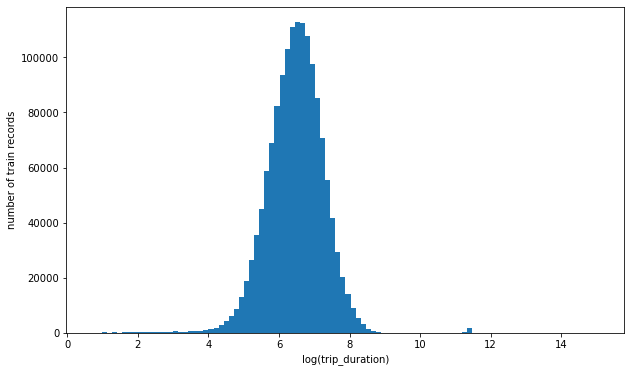

In [13]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.figure(figsize=(10,6))
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

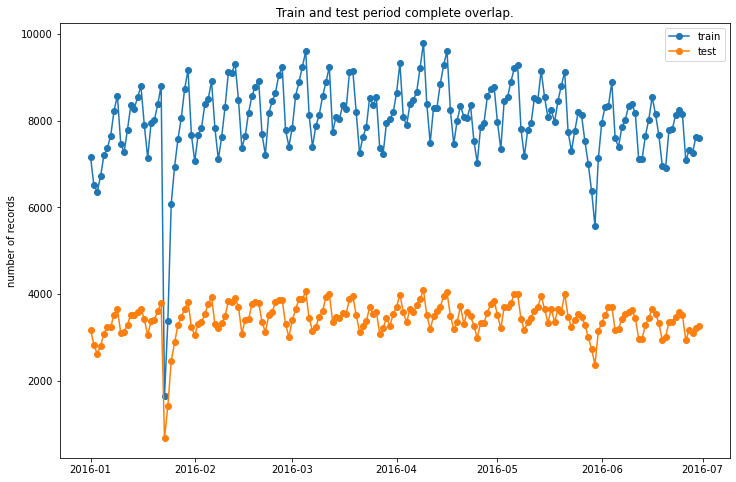

In [14]:
#Validation Strategy
plt.figure(figsize = (12,8))
plt.plot(train.groupby('pickup_date').count()[['id']],'o-',label = 'train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Train and test period complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

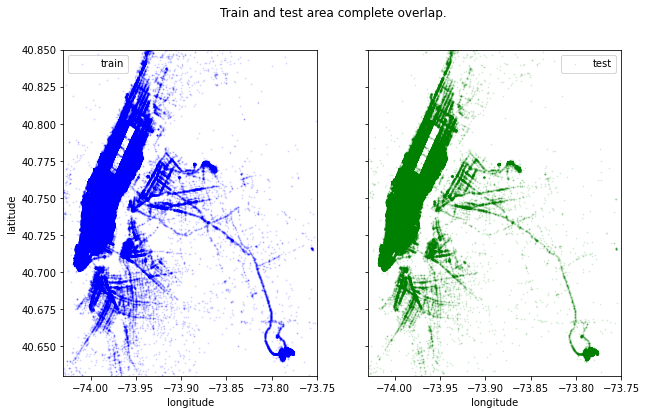

In [15]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig,ax = plt.subplots(ncols = 2,sharex= True, sharey = True, figsize = (10,6))
ax[0].scatter(train['pickup_longitude'].values, train['pickup_latitude'].values,
              color = 'blue', s=1, label = 'train',alpha = 0.1)
ax[1].scatter(test['pickup_longitude'].values, test['pickup_latitude'].values,
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [16]:
# The distribution of pickup_datetime and dropoff_datetime
sns.countplot(data = train,train['pickup_datetime'].dt.date, color = 'red', palette = 'Set2')

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_4324/1799277827.py, line 2)

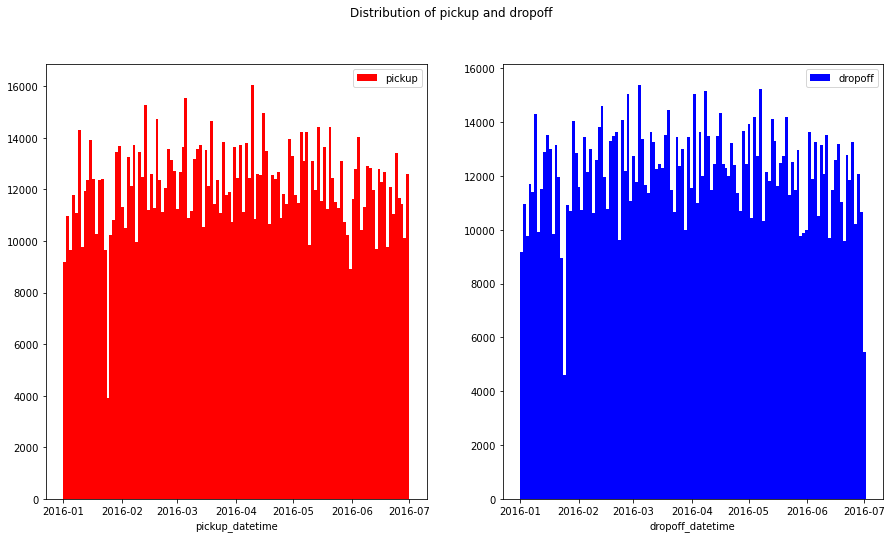

In [15]:
fig,ax = plt.subplots(ncols = 2, figsize = (15,8))
ax[0].hist(train['pickup_datetime'].values,color = 'red', bins=120, label = 'pickup')
ax[1].hist(train['dropoff_datetime'].values,color = 'blue', bins=120, label = 'dropoff')
fig.suptitle('Distribution of pickup and dropoff')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[0].set_xlabel('pickup_datetime')
ax[1].set_xlabel('dropoff_datetime')
plt.show()

Text(0, 0.5, 'Trip duration for each taxi ride')

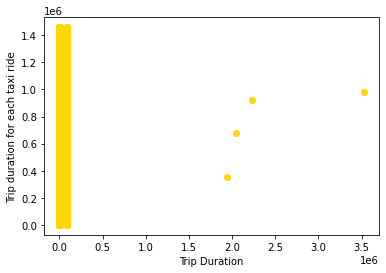

In [16]:
#Trip duration for each taxi driver
plt.scatter(train.trip_duration, train.index, color = 'gold')
plt.xlabel('Trip Duration')
plt.ylabel('Trip duration for each taxi ride')

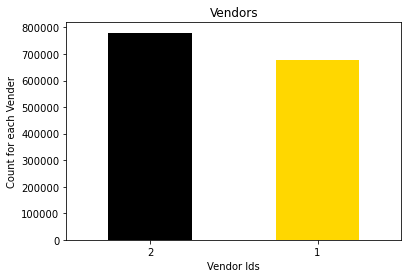

In [17]:
#Who is famous vendor?
train["vendor_id"].value_counts().plot(kind='bar',color=["black","gold"])
plt.xticks(rotation='horizontal')
plt.title("Vendors")
plt.ylabel("Count for each Vender")
plt.xlabel("Vendor Ids");

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

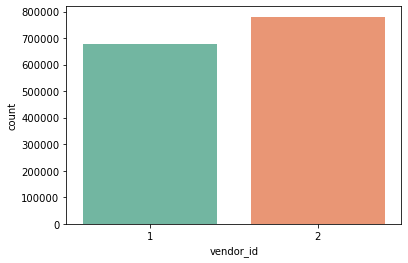

In [18]:
sns.countplot(train.vendor_id, palette = 'Set2')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passengers in a group of')

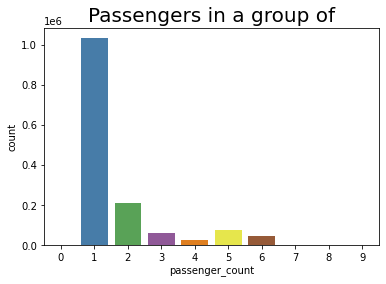

In [19]:
#How many passengers are traveling together?
sns.countplot(train['passenger_count'], palette = 'Set1')
plt.title("Passengers in a group of",fontsize=20)

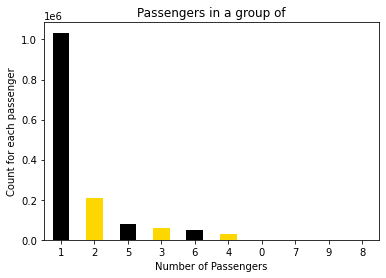

In [20]:
passengers = train["passenger_count"].value_counts().plot(kind='bar',color=["black","gold"])
plt.title("Passengers in a group of")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for each passenger")
plt.xlabel("Number of Passengers");

In [21]:
passengers = train["passenger_count"].value_counts()
passengers

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [22]:
#Whether the Trip Details are Stored Or Forwarded?
train["store_and_fwd_flag"].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 0, 'Flag')

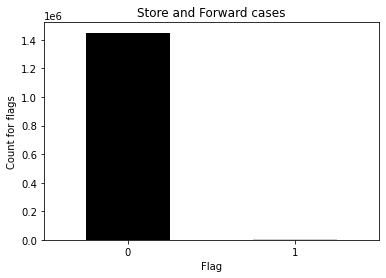

In [23]:
train["store_and_fwd_flag"].value_counts().plot(kind='bar',color=["black","gold"])
plt.title("Store and Forward cases")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for flags")
plt.xlabel("Flag")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='count'>

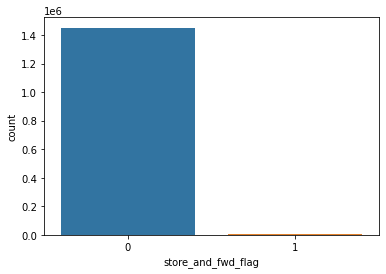

In [24]:
sns.countplot(train['store_and_fwd_flag'])

### Seasonal

In [25]:
#How about Dates and timings of the trips? - our temporal friends
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)


for df in (train,test):
    # Dates
    df['pickup_date'] = df['pickup_datetime'].dt.date

    # day of month 1 to 30/31
    df['pickup_day'] = df['pickup_datetime'].dt.day

    #month of year 1 to 12
    df['pickup_month'] = df['pickup_datetime'].dt.month

    #weekday 0 to 6
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


    #week of year
    df['pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear

    #hour of day 0 to 23
    df['pickup_hour'] = df['pickup_datetime'].dt.hour

    #minute of hour
    df['pickup_minute'] = df['pickup_datetime'].dt.minute

    # day of year
    df['pickup_dayofyear'] = df['pickup_datetime'].dt.dayofyear

train['pickup_dt'] = (train['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
train['pickup_week_hour'] = train['pickup_weekday'] * 24 + train['pickup_hour']


test['pickup_dt'] = (test['pickup_datetime'] - train['pickup_datetime'].min()).dt.total_seconds()
test['pickup_week_hour'] = test['pickup_weekday'] * 24 + test['pickup_hour']

C:\Users\Admin\AppData\Local\Temp/ipykernel_8324/1085102685.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear


In [26]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log_trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_dayofyear,pickup_dt,pickup_week_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,6.122493,14,3,0,11,17,24,74,6369878.0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,6.498282,12,6,6,23,0,43,164,14085798.0,144
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,7.661527,19,1,1,3,11,35,19,1596907.0,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6.063785,6,4,2,14,19,32,97,8364734.0,67
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,6.077642,26,3,5,12,13,30,86,7392638.0,133


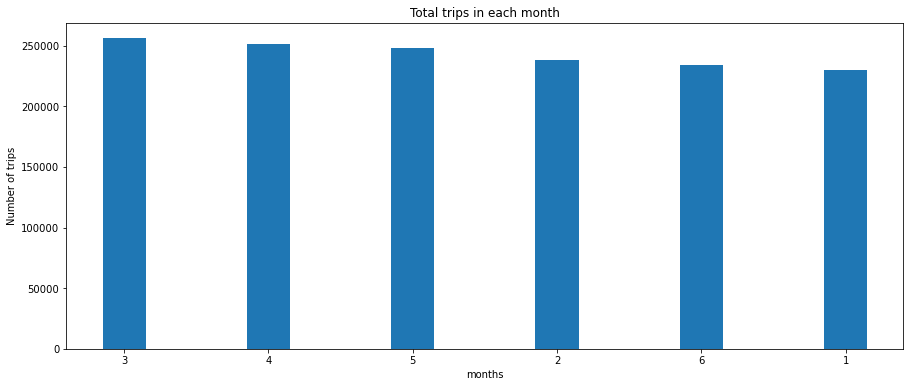

In [27]:
#Taxi trip by Month
plt.figure(figsize=(15, 6)) 
train.pickup_month.value_counts().plot(kind='bar',align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("months")
plt.ylabel("Number of trips")
plt.title("Total trips in each month");

In [28]:
#Taxi Trips By Pickup Dates
tripsByDate=train['pickup_date'].value_counts()

# Basic plot setup
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show
plot = figure( x_axis_type="datetime", tools="",
              toolbar_location=None, x_axis_label='Dates',
            y_axis_label='Taxi trip counts', title='Hover over points to see taxi trips')

x,y= tripsByDate.index, tripsByDate.values
plot.line(x,y, line_dash="4 4", line_width=1, color='gold')

cr = plot.circle(x, y, size=20,
                fill_color="gold", hover_fill_color="black",
                fill_alpha=0.05, hover_alpha=0.5,
                line_color=None, hover_line_color="black")
plot.left[0].formatter.use_scientific = False

plot.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(plot)

In [29]:
#Taxi Trips By Dropoff Date
train['dropoff_date'] = train['dropoff_datetime'].dt.date
tripsByDropoffDate=train['dropoff_date'].value_counts()

# Basic plot setup
plot = figure( x_axis_type="datetime", tools="",
              toolbar_location=None, x_axis_label='Dates',
            y_axis_label='Taxi trip counts', title='Hover over points to see taxi trips')

x,y= tripsByDropoffDate.index, tripsByDropoffDate.values
plot.line(x,y, line_dash="4 4", line_width=1, color='gold')

cr = plot.circle(x, y, size=20,
                fill_color="gold", hover_fill_color="black",
                fill_alpha=0.05, hover_alpha=0.5,
                line_color=None, hover_line_color="black")
plot.left[0].formatter.use_scientific = False

plot.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(plot)
train.drop('dropoff_date',axis=1,inplace=True)

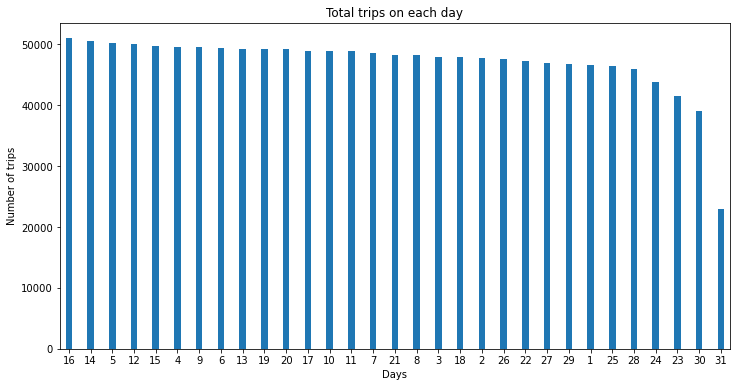

In [30]:
#Taxi Trips By Pickup Day of the Month
plt.figure(figsize = (12,6))
train.pickup_day.value_counts().plot(kind='bar',align='center',width=0.3)
plt.xlabel("Days")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total trips on each day");

In [31]:
train.pickup_month.unique()

array([3, 6, 1, 4, 5, 2], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_day', ylabel='log_trip_duration'>

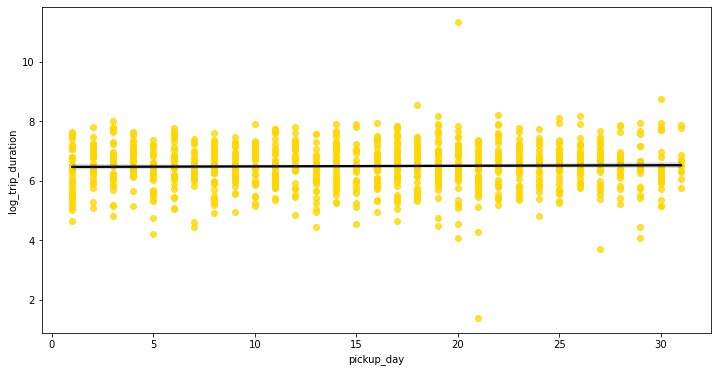

In [32]:
plt.figure(figsize=(12,6))
sns.regplot(train.pickup_day[:1000],train.log_trip_duration[:1000],color='gold', line_kws={'color':'black'})

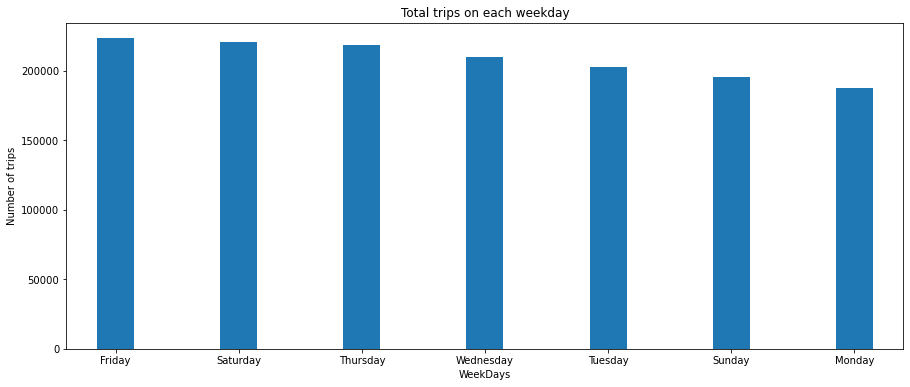

In [33]:
#Taxi Trips By Pickup WeekDays
train['pickup_weekday_name'] = train['pickup_datetime'].dt.strftime('%A')
plt.figure(figsize=(15, 6)) 
train.pickup_weekday_name.value_counts().plot(kind='bar',align='center',width=0.3)
plt.xlabel("WeekDays")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total trips on each weekday");
train.drop('pickup_weekday_name',axis=1,inplace=True)

Text(0.5, 1.0, 'Total pickups at each hour')

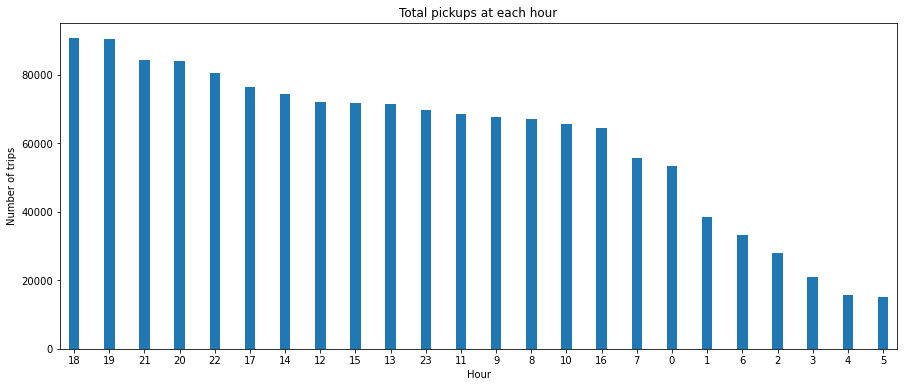

In [34]:
#Taxi Trips By Pickup Hour
plt.figure(figsize=(15, 6)) 
train.pickup_hour.value_counts().plot(kind='bar',align='center',width=0.3)
plt.xlabel("Hour")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour")

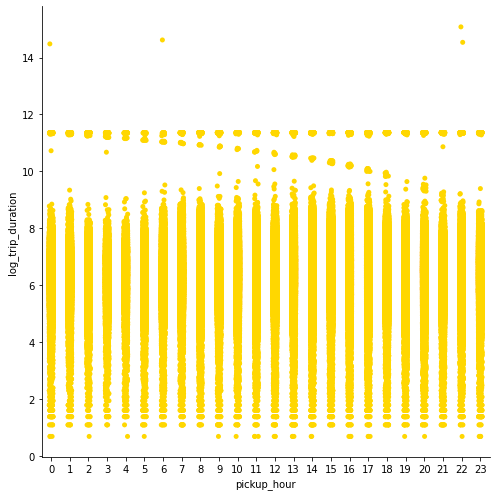

In [35]:
#Taxi trips by pickup hour and trip duration
sns.catplot(x="pickup_hour", y="log_trip_duration", data=train,color='gold',height=7)

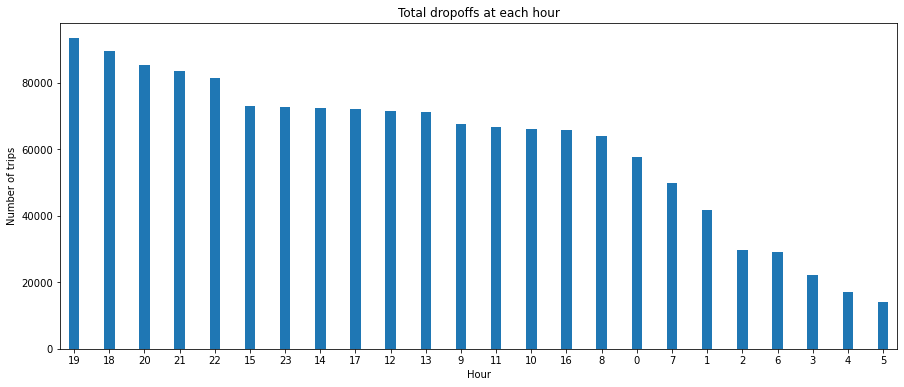

In [36]:
#Taxi Trips By Dropoff Hour
train['dropoff_hour'] = train['dropoff_datetime'].dt.hour
plt.figure(figsize=(15, 6)) 
train.dropoff_hour.value_counts().plot(kind='bar',align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("Hour")
plt.ylabel("Number of trips")
plt.title("Total dropoffs at each hour");
train.drop('dropoff_hour',axis=1,inplace=True)

In [39]:
#Calculate Distance and Speed of the trips
train = train[:100000]
test = test[:100000]
train['lat_diff'] = train['pickup_latitude'] - train['dropoff_latitude']
test['lat_diff'] = test['pickup_latitude'] - test['dropoff_latitude']

train['lon_diff'] = train['pickup_longitude'] - train['dropoff_longitude']
test['lon_diff'] = test['pickup_longitude'] - test['dropoff_longitude']
train.head(5)
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,...,pickup_month,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_dayofyear,pickup_dt,pickup_week_hour,lat_diff,lon_diff
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016-06-30,...,6,3,26,23,59,182,15724781.0,95,-0.024651,0.002045
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016-06-30,...,6,3,26,23,59,182,15724776.0,95,0.024590,-0.004395
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016-06-30,...,6,3,26,23,59,182,15724770.0,95,0.008060,-0.011276
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016-06-30,...,6,3,26,23,59,182,15724764.0,95,0.041431,0.030357
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016-06-30,...,6,3,26,23,59,182,15724756.0,95,0.005585,-0.008705


In [54]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [55]:
from haversine import haversine

In [56]:
train['haversine_distance'] = train.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
test['haversine_distance'] = test.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
train['log_haversine_distance'] = np.log1p(train['haversine_distance']) 
test['log_haversine_distance'] = np.log1p(test['haversine_distance']) 
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekofyear,pickup_hour,pickup_minute,pickup_dayofyear,pickup_dt,pickup_week_hour,lat_diff,lon_diff,haversine_distance,log_haversine_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,11,17,24,74,6369878.0,17,0.002335,-0.017525,1.498523,0.915700
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,23,0,43,164,14085798.0,144,0.007412,0.019066,1.805510,1.031585
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,3,11,35,19,1596907.0,35,0.053852,0.026306,6.385107,1.999465
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,14,19,32,97,8364734.0,67,0.013252,0.002228,1.485500,0.910474
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,12,13,30,86,7392638.0,133,0.010689,-0.000130,1.188590,0.783258


Text(0.5, 1.0, 'log(Haversine Distance) Vs log(Trip Duration)')

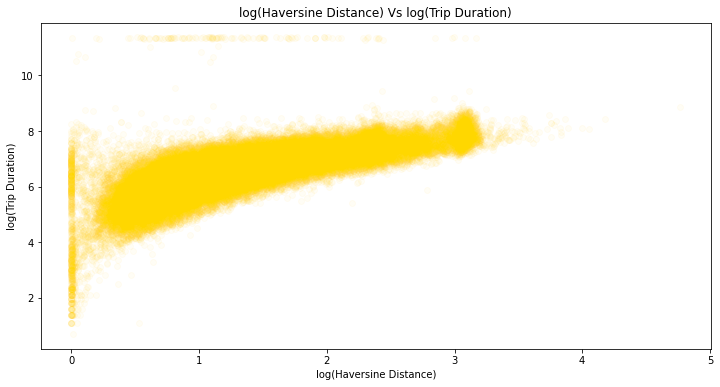

In [58]:
plt.figure(figsize = (12,6))
plt.scatter(train.log_haversine_distance,train.log_trip_duration,color="gold",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Haversine Distance)")
plt.title("log(Haversine Distance) Vs log(Trip Duration)")

In [62]:
train.loc[:, 'avg_speed_h'] = 1000 * train['haversine_distance'] / train['trip_duration']

test.loc[:, 'avg_speed_h'] = 1000 * test['haversine_distance'] / train['trip_duration']
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minute,pickup_dayofyear,pickup_dt,pickup_week_hour,lat_diff,lon_diff,haversine_distance,log_haversine_distance,avg_speed_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,17,24,74,6369878.0,17,0.002335,-0.017525,1.498523,0.915700,3.293457
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,43,164,14085798.0,144,0.007412,0.019066,1.805510,1.031585,2.723242
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,11,35,19,1596907.0,35,0.053852,0.026306,6.385107,1.999465,3.006171
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,19,32,97,8364734.0,67,0.013252,0.002228,1.485500,0.910474,3.462705
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,13,30,86,7392638.0,133,0.010689,-0.000130,1.188590,0.783258,2.732391


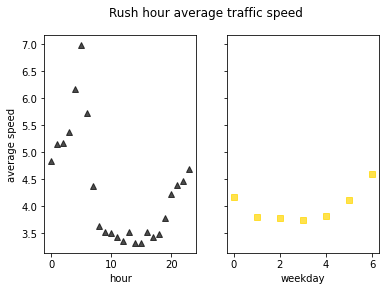

In [63]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(train.groupby('pickup_hour').mean()['avg_speed_h'], '^', lw=2, alpha=0.7,color='black')
ax[1].plot(train.groupby('pickup_weekday').mean()['avg_speed_h'], 's', lw=2, alpha=0.7,color='gold')
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()